## Financial inclusion dataset

- Performing exploratory data analysis on the financial inclusion dataset from zindi africa

### Steps to take
- Import libraries
- Import dataset
- Descriptive statistics on the dataset
- Perform univarate, bivariate and multivariate analysis

## Importing Libraries and modules

In [1]:
# importing relevant libraries for exploratory data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import files needed for exploration

train_data = pd.read_csv('Train.csv')
# test_data = pd.read_csv('Test.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
train_data.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


Now some descriptive statistics on the train dataset

In [5]:
train_data.shape

(23524, 13)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
train_data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

- So there are 13 columns in total and 23524 rows (labelled examples).
- No null values in all 23524 rows of the data

### Univariate data analysis

Now to begin exploratory data analysis, let us start with univarate analysis

In [8]:
train_data['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

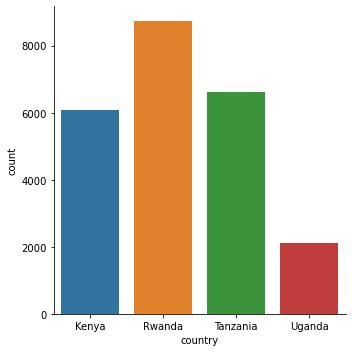

In [9]:
sns.catplot(data=train_data, x='country', kind='count')

The country feature in the dataset indicates that more data was collected from Rwanda and Uganda was the least

In [11]:
train_data['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

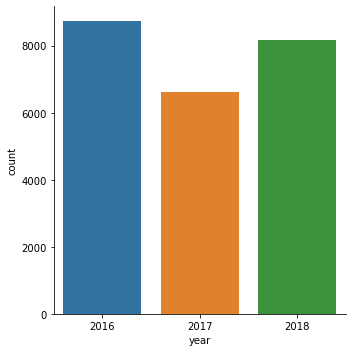

In [12]:
sns.catplot(data=train_data, x='year',kind='count')

The year feature in the dataset indicates that 2016 has more data collected compared to the other years (2017 and 2018)

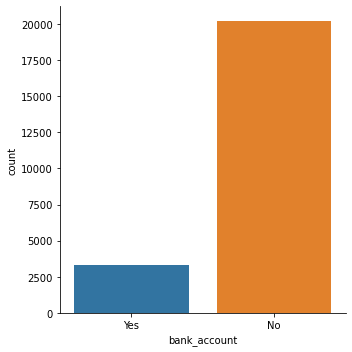

In [13]:
sns.catplot(data=train_data, x='bank_account', kind = 'count')

The bank_account feature show that there are more people in these countries without a bank account. The proportion is actually very large

In [14]:
train_data['location_type'].value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

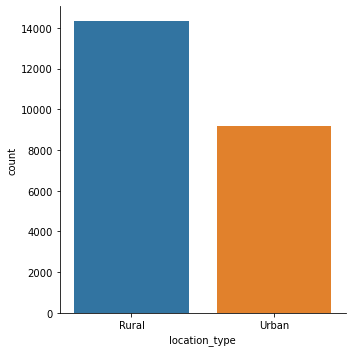

In [15]:
sns.catplot(data=train_data, x='location_type', kind='count')

The location_type feature shows that more of the data collected were from people who live in the rural parts of this countries

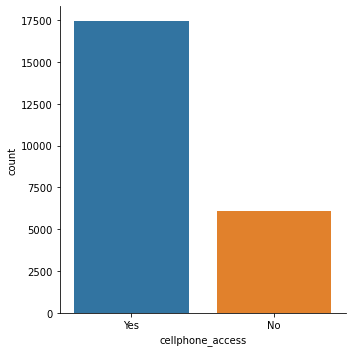

In [16]:
sns.catplot(data=train_data, x='cellphone_access', kind='count')

The cellphone_access feature shows that there are more individuals with cell phones than without

<AxesSubplot:xlabel='household_size', ylabel='Count'>

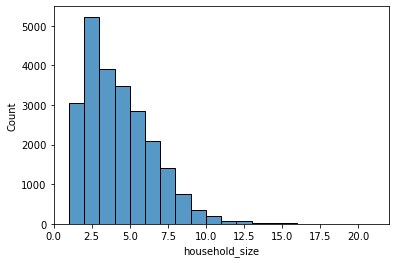

In [29]:
sns.histplot(data=train_data, x='household_size', bins=20)
# plt.hist(data=train_data, x='household_size')

The Household_size feature is not normally distributed. The size of 2-3 are the average size of households amoung the individuals

<AxesSubplot:xlabel='age_of_respondent', ylabel='Count'>

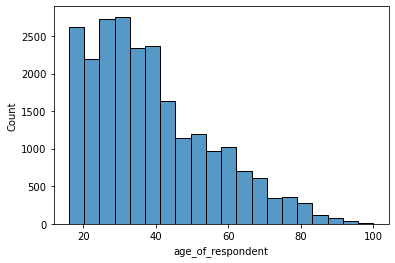

In [30]:
sns.histplot(data=train_data, x='age_of_respondent', bins=20)

In [33]:
print(round(train_data['age_of_respondent'].mean()))
print(train_data['age_of_respondent'].min())
print(train_data['age_of_respondent'].max())

39
16
100


The age of the individuals whose data are represented in the dataset are not evenly spreadout, with majority having their age between 20-40 years of age. With the lowest age being 16 and the highest being 100, the average age is 39

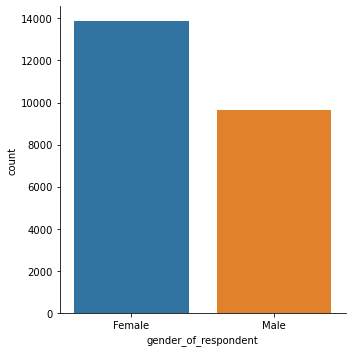

In [34]:
sns.catplot(data=train_data, x='gender_of_respondent', kind='count')

The gender_of_respondent feature in the dataset shows that there are more females than males whose data were recorded

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

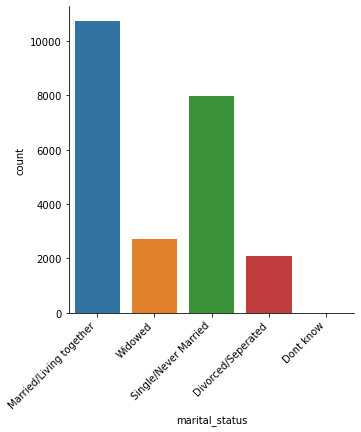

In [40]:
sns.catplot(data=train_data, x='marital_status', kind='count')

plt.xticks(
    rotation='45',
    horizontalalignment='right')

In the marital_status feature, most of the respondent are married/living together

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

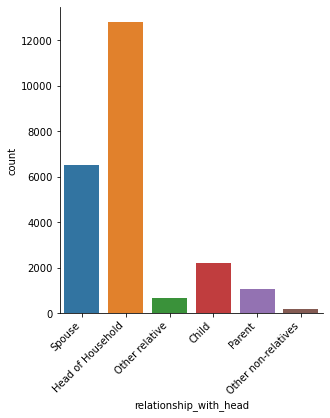

In [41]:
sns.catplot(data=train_data, x='relationship_with_head', kind='count')

plt.xticks(
    rotation='45',
    horizontalalignment='right')

In the relationship_with_head feature, most of the respondents are the head of their households.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

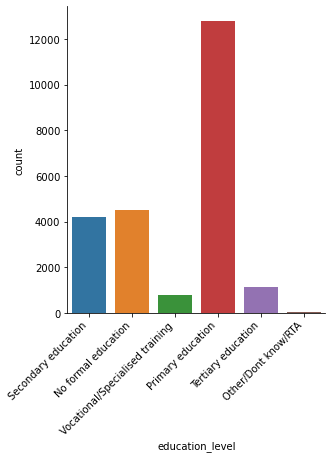

In [43]:
sns.catplot(data=train_data, x='education_level', kind='count')

plt.xticks(
    rotation='45',
    horizontalalignment='right')

In the education level feature, not many are educated beyond the primary education level. The primary education level is the most common education level with the respondents

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

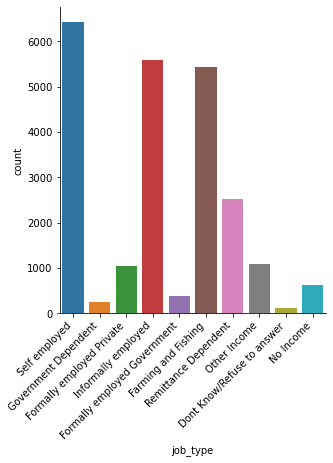

In [47]:
sns.catplot(data=train_data, x='job_type', kind='count')

plt.xticks(
    rotation='45',
    horizontalalignment='right')

### Bivariate Analysis

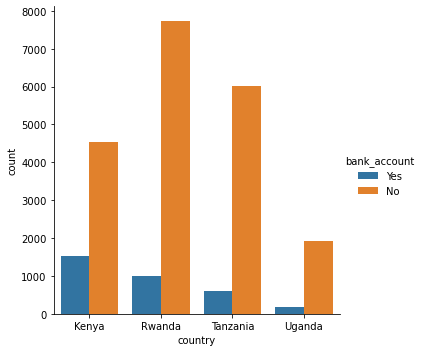

In [48]:
sns.catplot(data=train_data, x='country', kind='count', hue='bank_account')

Kenya as a country seem to have more individuals with bank accounts than other countries. While Rwanda has the most respondent without an account

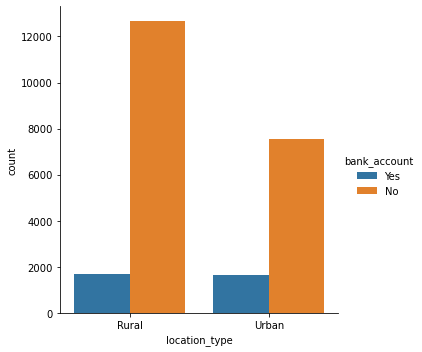

In [49]:
sns.catplot(data=train_data, x='location_type', kind='count', hue='bank_account')

More people in the rural areas do not have bank accounts

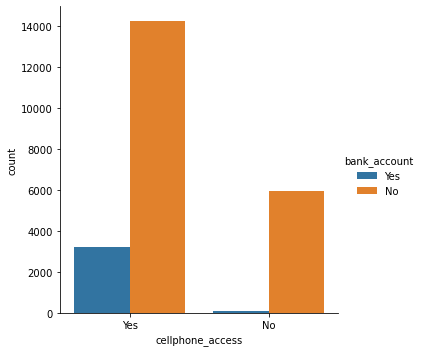

In [50]:
sns.catplot(data=train_data, x='cellphone_access', kind='count', hue='bank_account')

The respondents with cellphone access are far more than those withou, and also they have a larger number of people with cellphone access that both have an account and do not have one

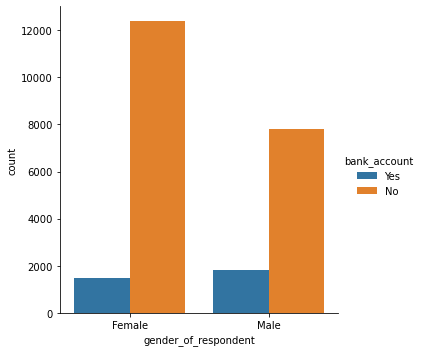

In [52]:
sns.catplot(data=train_data, x='gender_of_respondent', kind='count', hue='bank_account')

There are more female respondents without bank accounts than their male counterparts

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

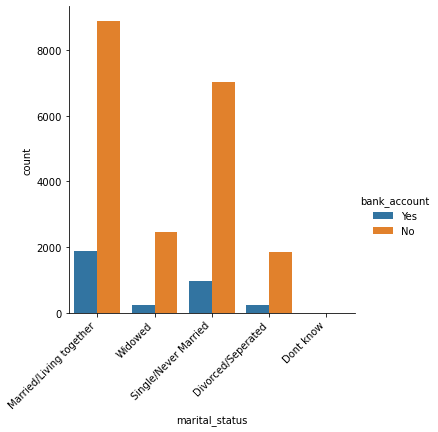

In [56]:
sns.catplot(data=train_data, x='marital_status', kind='count', hue='bank_account')

plt.xticks(
    rotation='45',
    horizontalalignment='right')

There are more married/living together respondants with and without bank accounts compared to other marital status

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

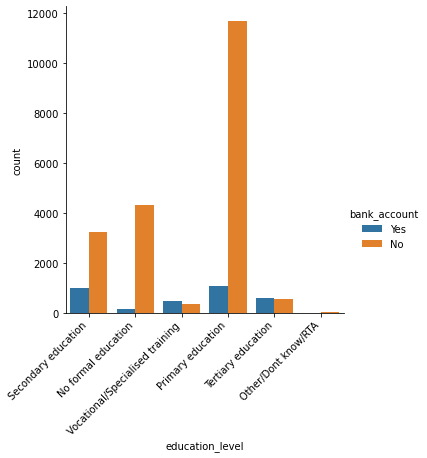

In [57]:
sns.catplot(data=train_data, x='education_level', kind='count', hue='bank_account')

plt.xticks(
    rotation = '45',
    horizontalalignment = 'right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

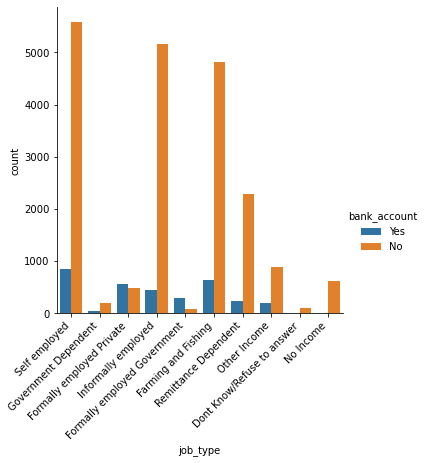

In [61]:
sns.catplot(data=train_data, x='job_type', kind='count', hue='bank_account')


plt.xticks(
    rotation = '45',
    horizontalalignment = 'right')

## Conclusion

- The current dataset spans 4 East African countries, with Rwanda having the highest representation (37%), followed by Tanzania (28%), Kenya (26%), and Uganda (9%). Kenya shows higher financial inclusion despite having fewer respondents.

- Data collection spans 2016-2018, with 2016 having the largest sample (37%). 

- There's a significant financial inclusion gap, with the majority lacking bank accounts. This aligns with known challenges in African financial inclusion. The urban-rural divide is particularly notable

- Age distribution shows a young-skewing population (mean age 39)

- Gender distribution shows more female respondents

- Education levels cluster around primary education, suggesting limited access to higher education

- Employment is dominated by self-employment and informal sectors